En esta actividad practicaremos lo aprendido por medio de el siguiente taller practico.  Siga las instrucciones de cada punto para resolverlo

1. Implementación de un Perceptrón Simple en TensorFlow

**Objetivo**: Implementar un perceptrón simple para clasificar la función lógica AND.



Cree una red neuronal ANN para entrenar la función AND

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf

# Datos de entrada (Función AND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])  # Etiquetas


In [3]:
# Definimos el modelo
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))])

# Usamos el descenso de gradiente estocástico como optimizador
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compilamos y medimos la diferencia entre las predicciones y las etiquetas verdaderas
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X, y, epochs=1000, verbose=0)

# Evaluamos el modelo
loss, accuracy = model.evaluate(X, y)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}') #la idea es que la pérdida sea baja y la precisión alta.

# Probamos haciendo una predicción
predicciones = model.predict(X)
print("Predicciones:")
print(np.round(predicciones)) # Aproximamos

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 1.0000 - loss: 0.1360
Pérdida: 0.1360, Precisión: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicciones:
[[0.]
 [0.]
 [0.]
 [1.]]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


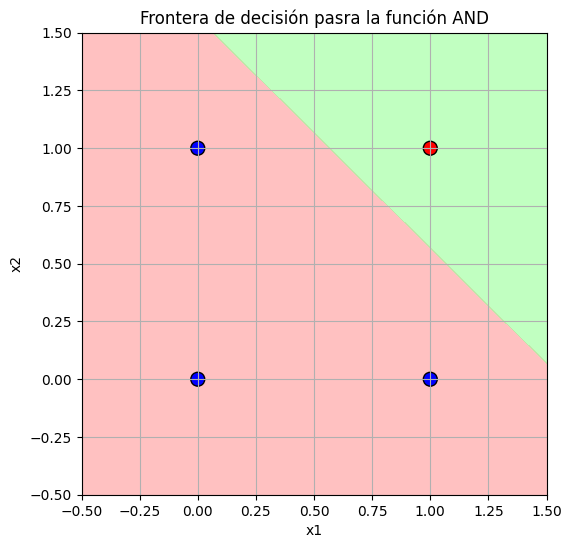

In [4]:
import matplotlib.pyplot as plt

# Creamos una cuadrícula de puntos para visualizar los resultados
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Obtenemos las predicciones del modelo para cada punto de la red malla
Z = model.predict(grid)
Z = Z.reshape(xx.shape) #le damos la forma de la cuadrícula original para poder graficarla bien

# Graficamos y coloreamos
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.6, colors=["#FF9999", "#99FF99"])  # rojo para 0, verde para 1
plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap="bwr", edgecolors='k', s=100) # grafica las etiquetas de entrada
plt.title("Frontera de decisión pasra la función AND")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

2. Clasificación de Dígitos con MLP en TensorFlow

**Objetivo**: Implementar un Perceptrón Multicapa (MLP) en TensorFlow para clasificar dígitos del dataset MNIST.

MNIST Se considera el "Hola mundo" del aprendizaje profundo, se basa en una base de datos de digitos escritos a mano, vamos a crera un modelo para que este pueda calsificar los digitos

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8759 - loss: 0.4272 - val_accuracy: 0.9599 - val_loss: 0.1329
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9667 - loss: 0.1087 - val_accuracy: 0.9714 - val_loss: 0.0943
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9795 - loss: 0.0682 - val_accuracy: 0.9715 - val_loss: 0.0958
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9836 - loss: 0.0535 - val_accuracy: 0.9734 - val_loss: 0.0831
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9875 - loss: 0.0401 - val_accuracy: 0.9761 - val_loss: 0.0839
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8804 - loss: 0.4123 - val_accuracy: 0.9576 - val_loss: 0.1407
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9622 - loss: 0.1248 - val_accuracy: 0.9705 - val_loss: 0.0975
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9759 - loss: 0.0788 - val_

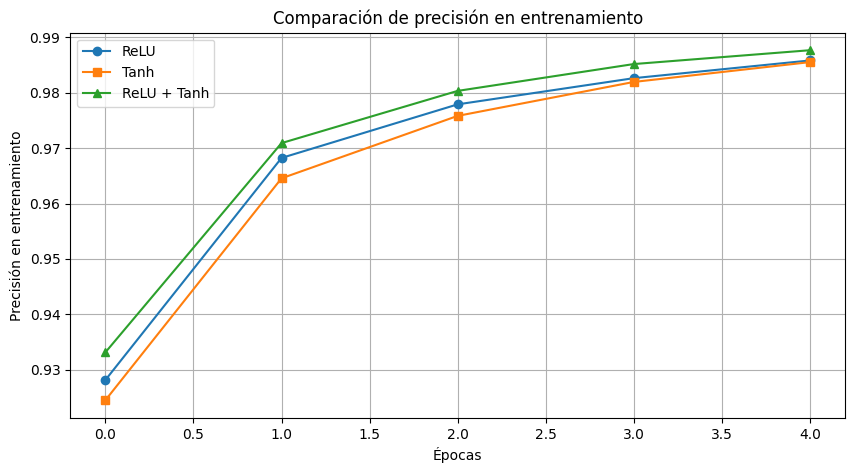

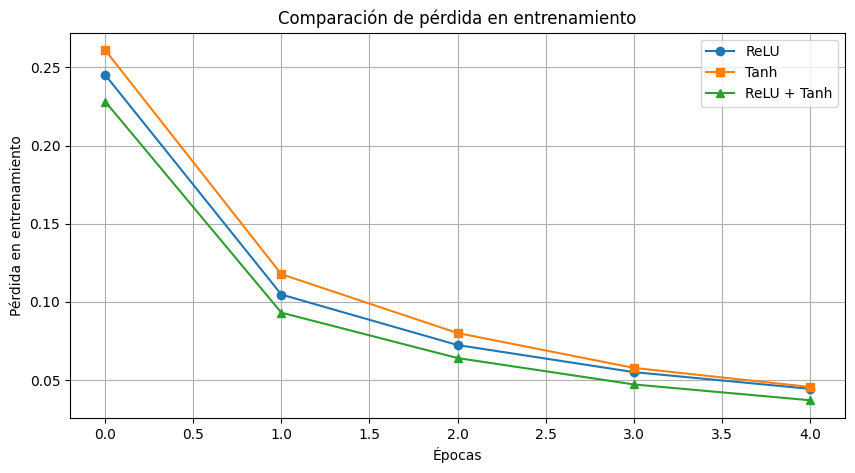

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar datos (entre 0 y 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Definir los modelos

def create_model(activation1, activation2, name):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=activation1),
        tf.keras.layers.Dense(64, activation=activation2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modelo con ReLU
model_relu = create_model('relu', 'relu', "ReLU")
# Modelo con Tanh
model_tanh = create_model('tanh', 'tanh', "Tanh")
# Modelo combinado (ReLU + Tanh)
model_relu_tanh = create_model('relu', 'tanh', "ReLU + Tanh")

# Entrenamiento de los modelos
history_relu = model_relu.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)
history_tanh = model_tanh.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)
history_relu_tanh = model_relu_tanh.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluar los modelos
loss_relu, acc_relu = model_relu.evaluate(X_test, y_test)
loss_tanh, acc_tanh = model_tanh.evaluate(X_test, y_test)
loss_relu_tanh, acc_relu_tanh = model_relu_tanh.evaluate(X_test, y_test)

# Imprimir los resultados
print(f'Precisión en test con ReLU: {acc_relu:.4f}')
print(f'Precisión en test con Tanh: {acc_tanh:.4f}')
print(f'Precisión en test con ReLU + Tanh: {acc_relu_tanh:.4f}')

# Graficar la comparación de precisión en entrenamiento
plt.figure(figsize=(10,5))
plt.plot(history_relu.history['accuracy'], label='ReLU', marker='o')
plt.plot(history_tanh.history['accuracy'], label='Tanh', marker='s')
plt.plot(history_relu_tanh.history['accuracy'], label='ReLU + Tanh', marker='^')
plt.xlabel('Épocas')
plt.ylabel('Precisión en entrenamiento')
plt.title('Comparación de precisión en entrenamiento')
plt.legend()
plt.grid()
plt.show()

# Graficar la comparación de pérdida en entrenamiento
plt.figure(figsize=(10,5))
plt.plot(history_relu.history['loss'], label='ReLU', marker='o')
plt.plot(history_tanh.history['loss'], label='Tanh', marker='s')
plt.plot(history_relu_tanh.history['loss'], label='ReLU + Tanh', marker='^')
plt.xlabel('Épocas')
plt.ylabel('Pérdida en entrenamiento')
plt.title('Comparación de pérdida en entrenamiento')
plt.legend()
plt.grid()
plt.show()


3. Regularización y Dropout en Redes Neuronales

**Objetivo**: Implementar técnicas de regularización (Dropout y L2) para evitar sobreentrenamiento.

 TAREA: Ajusta la cantidad de dropout y observa cómo afecta la precisión del modelo.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Entrenando con 0.1...
Dropout=0.1, Precisión en test: 0.8605
Entrenando con 0.2...
Dropout=0.2, Precisión en test: 0.8479
Entrenando con 0.3...
Dropout=0.3, Precisión en test: 0.8444
Entrenando con 0.4...
Dropout=0.4, Precisión en test: 0.8456
Entrenando con 0.5...
Dropout=0.5, Precisión en test: 0.8335


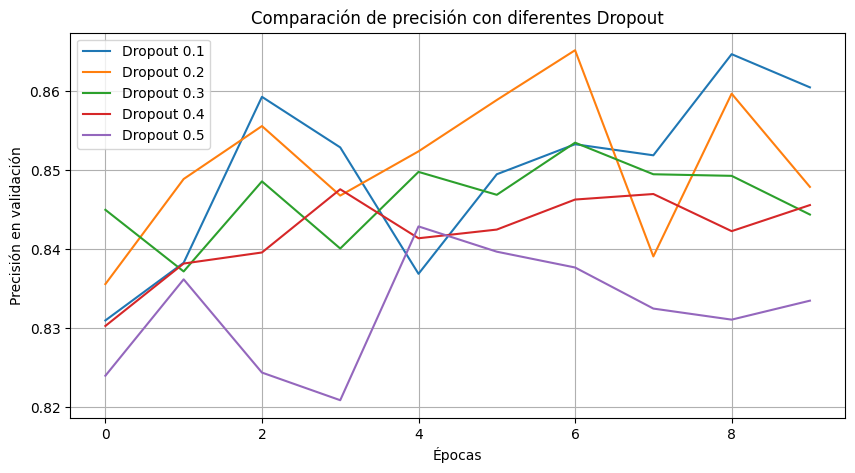

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Cargar los datos
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Valores de Dropout a probar
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
results = {}

for dropout in dropout_rates:
    print(f'Entrenando con {dropout}...')

    # Definir modelo con regularización y dropout
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

    # Evaluar el modelo
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    results[dropout] = {'history': history.history, 'accuracy': acc}
    print(f'Dropout={dropout}, Precisión en test: {acc:.4f}')

# Graficar los resultados
plt.figure(figsize=(10, 5))
for dropout, data in results.items():
    plt.plot(data['history']['val_accuracy'], label=f'Dropout {dropout}')

plt.title('Comparación de precisión con diferentes Dropout')
plt.xlabel('Épocas')
plt.ylabel('Precisión en validación')
plt.legend()
plt.grid(True)
plt.show()




4. Clasificación de Texto con Redes Neuronales

**Objetivo**: Implementar una red neuronal para clasificación de texto con embeddings en TensorFlow.

 TAREA: Prueba diferentes tamaños de embedding y capas ocultas para mejorar el modelo.


In [7]:
#EJERCICIO DEL PROFESOR

import tensorflow as tf
import tensorflow_datasets as tfds

# Cargar dataset
(ds_train, ds_test), info = tfds.load('movielens/100k-ratings', #contiene calificaciones de películas de distintos usuarios.
                                      split=['train[:80%]', 'train[80%:]'], #80% entrenamiento y 20% prueba
                                      as_supervised=False, #indica que los datos se cargarán como un diccionario.
                                      with_info=True) #permite acceder a información sobre el dataset.

#Extraemos los IDs únicos de Usuarios y Películas
user_ids = set()
movie_ids = set()

for example in tfds.as_numpy(ds_train):
    user_ids.add(example['user_id'].decode())
    movie_ids.add(example['movie_id'].decode())

#Convertimos los sets a listas ordenadas. Esto es importante para que las posiciones de los elementos sean siempre iguales
user_ids = sorted(list(user_ids))
movie_ids = sorted(list(movie_ids))


#Convertimos los IDs en índices numéricos
user_lookup = tf.keras.layers.StringLookup(vocabulary=user_ids, mask_token=None)
movie_lookup = tf.keras.layers.StringLookup(vocabulary=movie_ids, mask_token=None)

#Preprocesamiento de los datos
def preprocess(x):
    user = user_lookup(x['user_id'])       # string → int
    movie = movie_lookup(x['movie_id'])    # string → int
    rating = tf.cast(x['user_rating'], tf.float32) #flotante
    return (user, movie), rating

#Se transforman y se agrupan los datos para optimizar el rendimiento del entrenamiento.
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

#Construimos el modelo
user_input = tf.keras.Input(shape=(), dtype=tf.int32) #entrada para usuarios
movie_input = tf.keras.Input(shape=(), dtype=tf.int32) #entrada para películas

# Se usa embedding para representar cada usuario y película con vectores de 16 dimensiones.
user_embed = tf.keras.layers.Embedding(input_dim=len(user_ids) + 1, output_dim=16)(user_input)
movie_embed = tf.keras.layers.Embedding(input_dim=len(movie_ids) + 1, output_dim=16)(movie_input)

#Unir embeddings y crear capas ocultas
x = tf.keras.layers.Concatenate()([user_embed, movie_embed])
x = tf.keras.layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(1)(x) #la capa final es una neurona con salida linear (porque predecimos un valor continuo: la calificación).

#Definir modelo
model = tf.keras.Model(inputs=[user_input, movie_input], outputs=output)

#Compilar y entrenar el Modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(ds_train, epochs=5, validation_data=ds_test)

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(ds_test)

print(f"Pérdida (MSE): {loss:.4f}")
print(f"Error absoluto medio (MAE): {mae:.4f}")



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-ratings/incomplete.JDLXZU_0.1.1/movielens-train.tfrecord*..…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.
Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 3.4543 - mae: 1.3757 - val_loss: 0.9245 - val_mae: 0.7628
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.9163 - mae: 0.7591 - val_loss: 0.9083 - val_mae: 0.7551
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.8902 - mae: 0.7472 - val_loss: 0.8948 - val_mae: 0.7465
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.8620 - mae: 0.7333 - val_loss: 0.8957 - val_mae: 0.7458
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.8371 - mae: 0.7221 - val_loss: 0.8999 - val_mae: 0.7467
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8984 - mae: 0.7444
Pérdida (MSE): 0.8999
Error absoluto medio (MAE): 0.7467


In [8]:
#EJERCICIO CON LA BASE DE DATOS Yelp Polarity Reviews
import tensorflow as tf
import tensorflow_datasets as tfds

# Cargar dataset Yelp Polarity Reviews
(ds_train, ds_test), info = tfds.load(
    'yelp_polarity_reviews',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# Preprocesar el dataset (se convierte el texto a enteros y normalizamos)
encoder = tf.keras.layers.TextVectorization(max_tokens=10000, output_mode='int', output_sequence_length=250)
train_texts = ds_train.map(lambda text, label: text)
encoder.adapt(train_texts.batch(64))

# Construir modelo de red neuronal para texto
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar modelo
model.fit(ds_train.batch(64), epochs=5, validation_data=ds_test.batch(64))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/incomplete.UE5ZZO_0.2.0/yelp_polarity_reviews-train.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/incomplete.UE5ZZO_0.2.0/yelp_polarity_reviews-test.t…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.
Epoch 1/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 174s 20ms/step - accuracy: 0.8589 - loss: 0.3088 - val_accuracy: 0.9021 - val_loss: 0.2234
Epoch 2/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 157s 18ms/step - accuracy: 0.9168 - loss: 0.2037 - val_accuracy: 0.9289 - val_loss: 0.1778
Epoch 3/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 157s 18ms/step - accuracy: 0.9225 - loss: 0.1903 - val_accuracy: 0.9219 - val_loss: 0.1908
Epoch 4/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 162s 19ms/step - accuracy: 0.9255 - loss: 0.1834 - val_accuracy: 0.9192 - val_loss: 0.1940
Epoch 5/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 161s 18ms/step - accuracy: 0.9271 - loss: 0.1789 - val_accuracy: 0.9203 - val_loss: 0.1929


5. Pon a prueba tus conocimientos, selecciona una base de datos de clasificación, puedes usar alguna de las usadas en la semana pasada o cualquiera de tu preferencia. Implementa un MLP optimiza los hiperparametros agrega regulariazaciones hasta que tengas los mejores resultados. Haz una breve descripción de tus experimentos donde digas que cambiaste y como mejoró o empeoró tu modelo. Exitos

**Base de datos usada:** "Breast Cancer Wisconsin (Diagnostic) dataset" -> https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset

**Objetivo:** Clasificar tumores en benignos y malignos usando un modelo optimizado.

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer
import random

# Fijar semilla para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Cargar el dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Probar diferentes configuraciones
configuraciones = [
    {'dropout': 0.1, 'learning_rate': 0.0005, 'l2': 0.01, 'neurons': [128, 32]},
    {'dropout': 0.2, 'learning_rate': 0.0005, 'l2': 0.005, 'neurons': [128, 64]},
    {'dropout': 0.3, 'learning_rate': 0.001, 'l2': 0.01, 'neurons': [64, 32]},
    {'dropout': 0.4, 'learning_rate': 0.001, 'l2': 0.01, 'neurons': [64, 32, 16]},
]

# Bucle para probar configuraciones
for config in configuraciones:
    print(f"\nProbando configuración: {config}")

    # Construir modelo con parámetros actuales
    model = tf.keras.Sequential([
        Dense(config['neurons'][0], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(config['l2']), input_shape=(X_train.shape[1],)),
        Dropout(config['dropout']),
        Dense(config['neurons'][1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(config['l2'])),
        Dropout(config['dropout']),
        Dense(1, activation='sigmoid')
    ])

    # Compilar modelo
    optimizer = Adam(learning_rate=config['learning_rate'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar modelo
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluar modelo
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Precisión: {accuracy:.4f}, Pérdida: {loss:.4f}")


Probando configuración: {'dropout': 0.1, 'learning_rate': 0.0005, 'l2': 0.01, 'neurons': [128, 32]}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precisión: 0.9825, Pérdida: 0.1369

Probando configuración: {'dropout': 0.2, 'learning_rate': 0.0005, 'l2': 0.005, 'neurons': [128, 64]}
Precisión: 0.9737, Pérdida: 0.1491

Probando configuración: {'dropout': 0.3, 'learning_rate': 0.001, 'l2': 0.01, 'neurons': [64, 32]}
Precisión: 0.9825, Pérdida: 0.1183

Probando configuración: {'dropout': 0.4, 'learning_rate': 0.001, 'l2': 0.01, 'neurons': [64, 32, 16]}
Precisión: 0.9912, Pérdida: 0.1344


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9794 - loss: 0.1824
Precisión en el conjunto de prueba: 0.9825, Pérdida: 0.1609


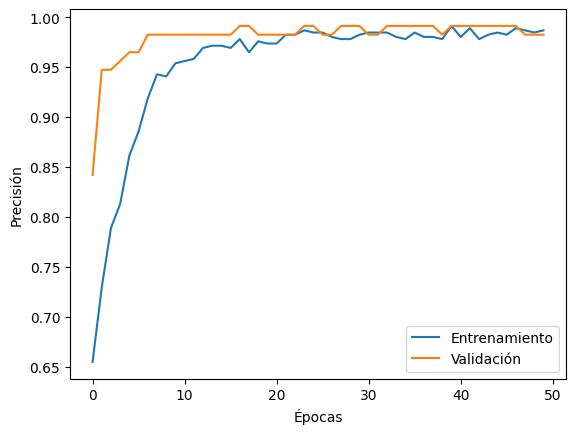

In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import random

# Fijar semilla para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Cargar el dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Construcción del modelo MLP optimizado
def build_model(dropout_rate=0.4, learning_rate=0.001, l2_value=0.01):
    model = tf.keras.Sequential([
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_value), input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_value)),
        Dropout(dropout_rate),
        Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_value)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Entrenar el modelo con hiperparámetros óptimos
model = build_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy:.4f}, Pérdida: {loss:.4f}')

# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()



**Análisis y experimentación:**

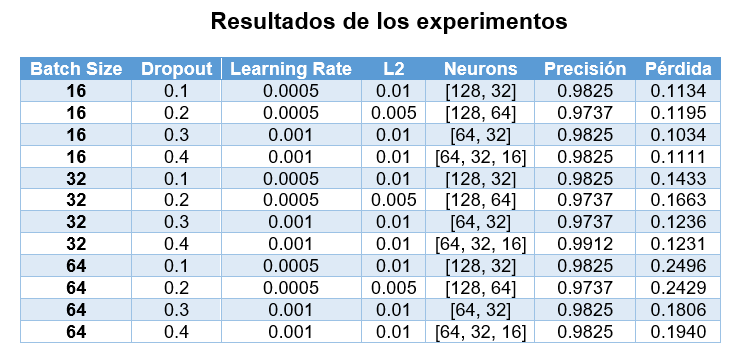

* Al experimentar con varias configuraciones de hiperparámetros como se puede ver en el código y jugar con el batch size, noté que valores más pequeños, como 16, permitían una menor pérdida (0.1034) y una buena precisión (0.9825), lo que indicaba que los gradientes estaban bien optimizados. Sin embargo, la variabilidad entre iteraciones era mayor. Por otro lado, un batch size de 32 resultó ser el mejor equilibrio, ya que alcanzó la mejor precisión (0.9912) con una pérdida aceptable (0.1344). En contraste, cuando probé con un batch size de 64, observé que la pérdida aumentaba considerablemente (0.1806 - 0.2496), lo que sugiere que la convergencia se volvía más difícil. Con esta información, concluí que un batch size intermedio, como 32, era la mejor opción para mantener estabilidad y precisión.

* Por otro lado, cuando ajusté el dropout, noté que valores bajos, como 0.1 o 0.2, permitían al modelo aprender más rápido, pero también lo hacían más propenso al sobreajuste. En cambio, con un dropout de 0.3 o 0.4, el modelo lograba una generalización más efectiva, reduciendo la posibilidad de memorizar los datos de entrenamiento. Me di cuenta de que con batch sizes más grandes, el dropout alto ayudaba a estabilizar el aprendizaje, mientras que con batch sizes pequeños, un dropout excesivo podía afectar la capacidad del modelo para aprender patrones complejos.

* Ajustar la learning rate fue muy importante para la convergencia del modelo puesto que con un valor de 0.0005, observé que la pérdida era menor en algunos casos, pero el entrenamiento tomaba más tiempo y el modelo avanzaba lentamente. Al aumentar la tasa de aprendizaje a 0.001, la convergencia fue más rápida y los resultados fueron más estables. Esto me llevó a elegir 0.001 como el valor más adecuado, ya que permitía un entrenamiento eficiente sin causar variabilidad en los gradientes.

* La regularización L2 tien un papel interesante en la estabilidad del modelo ya que, al probar con 0.005, noté que el modelo aprendía bien, pero en algunas configuraciones los pesos crecían demasiado, lo que podía afectar la generalización. Al aumentar la L2 a 0.01, el modelo se volvió más robusto y evitó que los pesos se dispararan, manteniendo un equilibrio entre precisión y estabilidad. Esta regularización fue especialmente útil en redes más profundas, donde la cantidad de parámetros era mayor.

* Finalmente, la arquitectura de la red neuronal tuvo un impacto significativo en el rendimiento pues para modelos más simples, como aquellos con [128, 32] neuronas, funcionaban bien con batch sizes pequeños, pero no capturaban patrones complejos de manera óptima. En cambio, cuando probé arquitecturas más profundas, como [64, 32, 16], noté que el modelo lograba una precisión más alta y generalizaba mejor, especialmente con batch sizes de 32. Esto me llevó a concluir que el dataset requería una red con cierta profundidad para capturar sus características de manera efectiva, pero sin exceder la cantidad de capas, ya que eso podría hacer que el modelo fuera más difícil de entrenar.

(Cabe aclarar que la precisión siempre fue alta en todos los experimentos)

* Se podría seguir puliendo más el modelo probando muchas otras configuraciones o variando el número de épocas de acuerdo a lo que se evidencia en la gráfica.

* Después de analizar todos estos factores, llegué a la conclusión de que la mejor configuración para este problema era utilizar un batch size de 32, con un dropout de 0.4, una learning rate de 0.001, una regularización L2 de 0.01 y una arquitectura de [64, 32, 16] neuronas. Esta combinación ofreció el mejor equilibrio entre precisión y pérdida, permitiéndome entrenar un modelo estable y eficiente sin riesgo de sobreajuste.

